# Cleaning University of California Berkeley Power Consumption Dataset

The data retrieved from [UCB's energy dashboard](https://engagementdashboard.com/ucb/ucb) regarding power consumption in UCB's Mechanical Engineering building is in the form of a `json` format. Here we'll be converting it into a `csv` file for later data analysis. 


In [3]:
import numpy as np
import pandas as pd
import json
import pprint
from datetime import datetime

In [4]:
#Format into dates
def format_time(unix_timestamp):
    format = '%Y-%m-%d'
    ts = int(unix_timestamp)
    return datetime.utcfromtimestamp(ts).strftime(format)

#Create list of datetime objects from timestamps
def gen_datetimes(li):
    datetimes = []
    for time in li:
        datetimes.append(datetime.utcfromtimestamp(time))
    return datetimes

In [6]:
with open('Datasets/UCB_PowerConsumption.json') as json_file:
    data = json.load(json_file)[0]
    
pprint.pprint(data)

{'actual': {'data': [{'completeness': 2.0,
                      'timestamp': 1573632000,
                      'value': 9292.0},
                     {'completeness': 2.0,
                      'timestamp': 1573718400,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1573804800,
                      'value': 9150.0},
                     {'completeness': 2.0,
                      'timestamp': 1573891200,
                      'value': 8332.0},
                     {'completeness': 2.0,
                      'timestamp': 1573977600,
                      'value': 8239.0},
                     {'completeness': 2.0,
                      'timestamp': 1574064000,
                      'value': 9245.0},
                     {'completeness': 2.0,
                      'timestamp': 1574150400,
                      'value': 9339.0},
                     {'completeness': 2.0,
                      'timestamp': 1574236800,


                      'value': 7619.0},
                     {'completeness': 2.0,
                      'timestamp': 1596351600,
                      'value': 7601.0},
                     {'completeness': 2.0,
                      'timestamp': 1596438000,
                      'value': 7899.0},
                     {'completeness': 2.0,
                      'timestamp': 1596524400,
                      'value': 8023.0},
                     {'completeness': 2.0,
                      'timestamp': 1596610800,
                      'value': 7964.0},
                     {'completeness': 2.0,
                      'timestamp': 1596697200,
                      'value': 7992.0},
                     {'completeness': 2.0,
                      'timestamp': 1596783600,
                      'value': 7851.0},
                     {'completeness': 2.0,
                      'timestamp': 1596870000,
                      'value': 7663.0},
                     {'completeness': 2.0,
       

                        'timestamp': 1581667200,
                        'value': 8673.307},
                       {'completeness': 1.0,
                        'timestamp': 1581753600,
                        'value': 7703.1836},
                       {'completeness': 1.0,
                        'timestamp': 1581840000,
                        'value': 7662.8257},
                       {'completeness': 1.0,
                        'timestamp': 1581926400,
                        'value': 8658.464},
                       {'completeness': 1.0,
                        'timestamp': 1582012800,
                        'value': 8843.579},
                       {'completeness': 1.0,
                        'timestamp': 1582099200,
                        'value': 8863.062},
                       {'completeness': 1.0,
                        'timestamp': 1582185600,
                        'value': 8818.573},
                       {'completeness': 1.0,
                        'timesta

              'id': 3303,
              'label': 'Etcheverry Hall',
              'partialPeriods': [],
              'sum': 3117180.5,
              'unit': 'kWh'}}


In [8]:
#Split dataset
actual = data['actual']
expected = data['baseline']

#Create new dataframe
df_power = pd.DataFrame(columns = ['act_power', 'exp_power', 'date','timestamp'])
df_power.head()

,act_power,exp_power,date,timestamp


In [9]:
actual_li = actual['data']
expected_li = expected['data']
loc = 0

for i in range(len(actual_li)):
    #Get corresponding dicts
    dt1 = actual_li[i]
    dt2 = expected_li[i]
    
    #Ensure they're of the same time
    assert(dt1['timestamp'] == dt2['timestamp'])
    
    #Get data in appropriate format
    time = format_time(dt1['timestamp'])
    act_power = dt1['value']
    exp_power = dt2['value']
    ts = dt1['timestamp']
    
    #Add to dataframe
    df_power.loc[loc] = [act_power, exp_power, time, ts]
    
    #Increment location tracker
    loc += 1
    
#Print out final data
df_power.head()

,act_power,exp_power,date,timestamp
0,9292.0,8868.1940,2019-11-13,1573632000
1,9245.0,8777.3200,2019-11-14,1573718400
2,9150.0,8667.0920,2019-11-15,1573804800
3,8332.0,7767.8486,2019-11-16,1573891200
4,8239.0,7790.5220,2019-11-17,1573977600


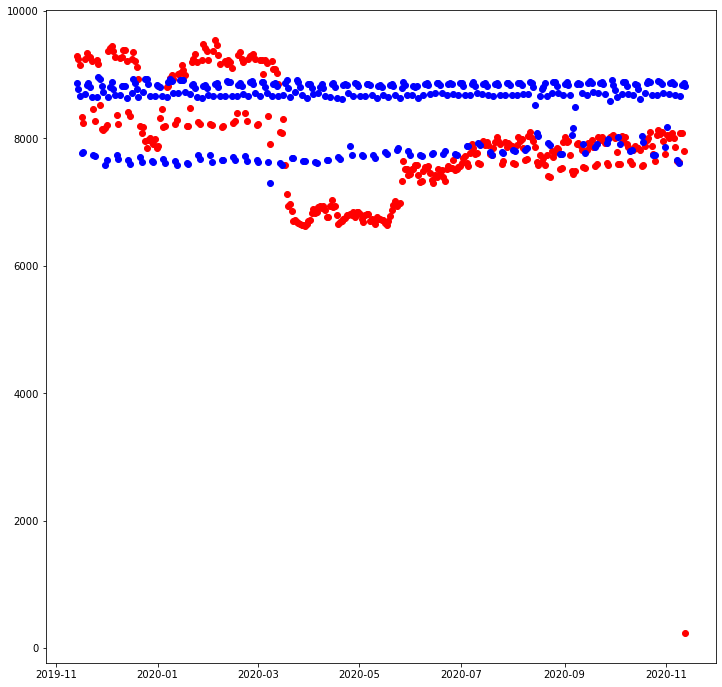

In [16]:
#Plotting data for exploratory analysis 
from matplotlib.dates import date2num
import matplotlib.pyplot as plt

#Select subset of data by altering variables. Choose entire scale by 1, 0
num_split = 1
num_piece = 0
df = np.split(df_power, num_split)[num_piece]

plt.figure(figsize=(12,12))
#Convert timestamps into correct date format for matplotlib
dates = date2num(gen_datetimes(df['timestamp']))
#Plot points
plt.plot_date(dates, df['act_power'], color='Red')
plt.plot_date(dates, df['exp_power'], color='Blue')
plt.show()

In [17]:
#Place dataset in .csv file
df_power.to_csv('Datasets/UCB_PowerConsumption.csv', index=False)